<a href="https://colab.research.google.com/github/CaillahR/Adult-Income-Dataset/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Caillah Reed

#Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
set_config(display='diagram')

#Loading Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/archive.zip")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Adult Income

##Objective

 What is the possibility in predicting the income level based on the individual’s personal information, in canada?



##Data Dictionary

- age : Age of adult in dataset
- workclass : type of employement, (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.)
- fnlwgt : final weight. the number of people the census believes are true wages
- education : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- educational-num : same as education
- marital-status : marital status
- occupation : occupation
- relationship : relationship to their family
- race : race
- gender : gender
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: People's native country

- The source of this data set is from [Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

##Droping duplicates

In [3]:
duplicaterows = df[df.duplicated(keep='last')]
duplicaterows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1668,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
1854,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,<=50K
1863,20,?,203353,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
4152,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
5078,29,?,41281,Bachelors,13,Married-spouse-absent,?,Not-in-family,White,Male,0,0,50,United-States,<=50K
5782,21,Private,301694,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,35,Mexico,<=50K
5907,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
df = df.drop_duplicates()

##Inspect Numerical Errors

In [5]:
df.describe(include="number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- Filtering all rows with age under 18 because they are not considered adults in Canada

In [6]:
age_filter = df["age"] > 18

df = df.loc[age_filter]
display(df.describe())
df.info()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47335.000000,4.733500e+04,47335.000000,47335.000000,47335.000000,47335.000000
mean,39.300180,1.897360e+05,10.155213,1111.013563,89.180184,40.934594
std,13.402909,1.055463e+05,2.558475,7564.174322,407.078597,12.072850
min,19.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,29.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.374980e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47335 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47335 non-null  int64 
 1   workclass        47335 non-null  object
 2   fnlwgt           47335 non-null  int64 
 3   education        47335 non-null  object
 4   educational-num  47335 non-null  int64 
 5   marital-status   47335 non-null  object
 6   occupation       47335 non-null  object
 7   relationship     47335 non-null  object
 8   race             47335 non-null  object
 9   gender           47335 non-null  object
 10  capital-gain     47335 non-null  int64 
 11  capital-loss     47335 non-null  int64 
 12  hours-per-week   47335 non-null  int64 
 13  native-country   47335 non-null  object
 14  income           47335 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


## Inspect Categorical Values for Errors

- Dropping fnlwgt, relationship, educational-num these either don't contribute to predicting income or are too similar to another column.

In [7]:
df = df.drop(columns = ["fnlwgt", "relationship", "educational-num"])

In [8]:
cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  display(df[col].value_counts())

Private             32769
Self-emp-not-inc     3832
Local-gov            3100
?                    2544
State-gov            1965
Self-emp-inc         1675
Federal-gov          1425
Without-pay            21
Never-worked            4
Name: workclass, dtype: int64

HS-grad         15507
Some-college    10669
Bachelors        8013
Masters          2655
Assoc-voc        2060
Assoc-acdm       1601
11th             1287
10th             1138
7th-8th           943
Prof-school       834
9th               710
Doctorate         594
5th-6th           499
12th              499
1st-4th           245
Preschool          81
Name: education, dtype: int64

Married-civ-spouse       22352
Never-married            14648
Divorced                  6629
Separated                 1529
Widowed                   1516
Married-spouse-absent      624
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       6135
Exec-managerial      6066
Craft-repair         6057
Adm-clerical         5484
Sales                5193
Other-service        4503
Machine-op-inspct    2987
?                    2548
Transport-moving     2337
Handlers-cleaners    1933
Farming-fishing      1444
Tech-support         1440
Protective-serv       970
Priv-house-serv       223
Armed-Forces           15
Name: occupation, dtype: int64

White                 40431
Black                  4566
Asian-Pac-Islander     1497
Amer-Indian-Eskimo      456
Other                   385
Name: race, dtype: int64

Male      31880
Female    15455
Name: gender, dtype: int64

United-States                 42414
Mexico                          924
?                               842
Philippines                     290
Germany                         204
Puerto-Rico                     180
Canada                          178
El-Salvador                     151
India                           149
Cuba                            137
China                           122
England                         122
South                           115
Jamaica                         105
Italy                           104
Dominican-Republic              102
Japan                            92
Vietnam                          86
Poland                           85
Guatemala                        85
Columbia                         83
Haiti                            73
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Ecuador                     

<=50K    35654
>50K     11681
Name: income, dtype: int64

- Dropping rows with "Without-pay", "Never-worked" in workclass, this data does not help us predict income


In [9]:
workclass_filter = df["workclass"]=="Never-worked"
workclass_wo_filter = df["workclass"]=="Without-pay"


In [10]:
df = df[~workclass_filter]
df = df [~workclass_wo_filter]
df["workclass"] = df["workclass"].replace("?","Unknown")
df["workclass"].value_counts()

<ipython-input-10-949374c5d267>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df [~workclass_wo_filter]
<ipython-input-10-949374c5d267>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["workclass"] = df["workclass"].replace("?","Unknown")


Private             32769
Self-emp-not-inc     3832
Local-gov            3100
Unknown              2544
State-gov            1965
Self-emp-inc         1675
Federal-gov          1425
Name: workclass, dtype: int64

- Combining data into categories that are easier to follow.

In [11]:
 df["workclass"] = df["workclass"].replace({"Self-emp-not-inc": "Self-Emp", 
                               "Self-emp-inc": "Self-Emp",
                               "Local-gov":"Gov",
                               "State-gov":"Gov",
                               "Federal-gov":"Gov"})

<ipython-input-11-03ce82bf734f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["workclass"] = df["workclass"].replace({"Self-emp-not-inc": "Self-Emp",


In [12]:
 df["marital-status"] = df["marital-status"].replace({"Married-civ-spouse": "Married", 
                               "Married-spouse-absent":"Married",
                               "Married-AF-spouse":"Married",
                               "Never-married":"Single",
                               "Divorced":"Single",
                               "Separated":"Single",
                               "Widowed":"Single"})

<ipython-input-12-b936a45567c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marital-status"] = df["marital-status"].replace({"Married-civ-spouse": "Married",


In [13]:
 df["education"] = df["education"].replace({"12th": "HS-Grad", 
                               "11th":"Non-HS-Grad",
                               "10th":"Non-HS-Grad",
                               "9th":"Non-HS-Grad",
                               "7th-8th":"Non-HS-Grad",
                               "5th-6th":"Non-HS-Grad",
                               "1st-4th":"Non-HS-Grad",
                               "Preschool":"Non-HS-Grad",
                               "Assoc-voc":"Assoc",
                               "Assoc-acdm":"Assoc"})

In [14]:
 df["native-country"] = df["native-country"].replace({"South": "Unknown", 
                               "?":"Unknown"})

In [16]:
#Checking our overall data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47310 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47310 non-null  int64 
 1   workclass       47310 non-null  object
 2   education       47310 non-null  object
 3   marital-status  47310 non-null  object
 4   occupation      47310 non-null  object
 5   race            47310 non-null  object
 6   gender          47310 non-null  object
 7   capital-gain    47310 non-null  int64 
 8   capital-loss    47310 non-null  int64 
 9   hours-per-week  47310 non-null  int64 
 10  native-country  47310 non-null  object
 11  income          47310 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.7+ MB


,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,Non-HS-Grad,Single,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Gov,Assoc,Married,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,Non-HS-Grad,Single,Other-service,White,Male,0,0,30,United-States,<=50K


## Missing Values

In [17]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [18]:
#the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

age               0.0
workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
race              0.0
gender            0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


#Exploratory Univariate Visuals

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47310 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47310 non-null  int64 
 1   workclass       47310 non-null  object
 2   education       47310 non-null  object
 3   marital-status  47310 non-null  object
 4   occupation      47310 non-null  object
 5   race            47310 non-null  object
 6   gender          47310 non-null  object
 7   capital-gain    47310 non-null  int64 
 8   capital-loss    47310 non-null  int64 
 9   hours-per-week  47310 non-null  int64 
 10  native-country  47310 non-null  object
 11  income          47310 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.7+ MB


Text(0.5, 0, '')

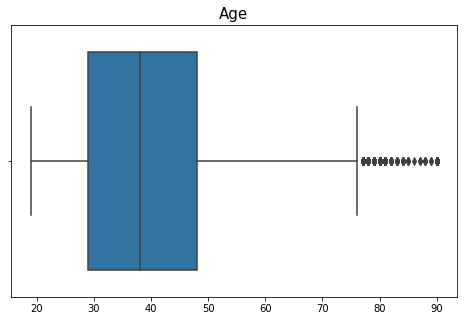

In [20]:
fig = plt.figure(figsize =(8, 5))
ax = sns.boxplot( x="age", data=df)
ax.set_title("Age", fontsize = 15);
ax.set_xlabel('')

- Outliers are ages from 77 years and up

Text(0.5, 1.0, 'Work Class')

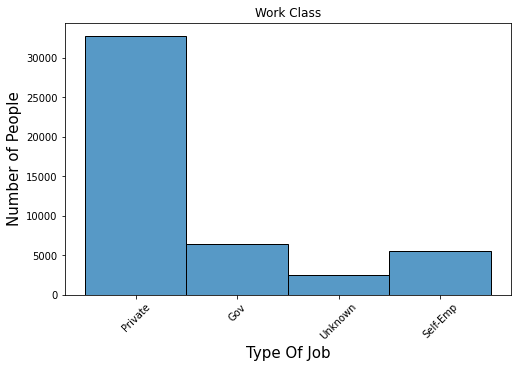

In [21]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "workclass", data=df)
plt.xticks(rotation=45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Type Of Job', fontsize = 15)
ax.set_title("Work Class")

- Outlier : Private

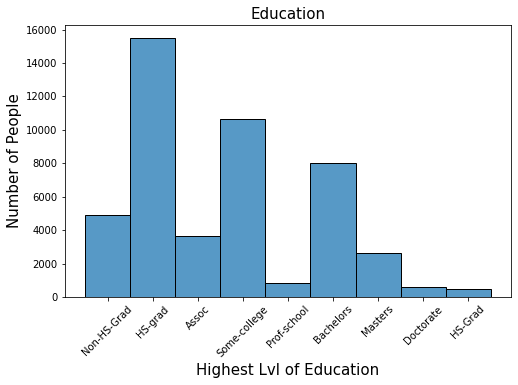

In [22]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "education", data=df)
plt.xticks(rotation=45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Highest Lvl of Education', fontsize = 15)
ax.set_title("Education", fontsize = 15);

- Outliers here seems to be HS gradutates, Prof-school, Doctorate, and HS-Grad.

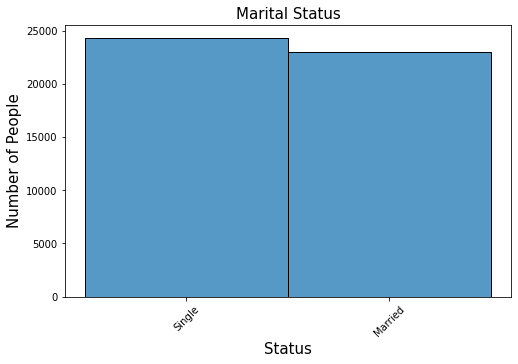

In [23]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "marital-status", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Status', fontsize = 15)
ax.set_title("Marital Status", fontsize = 15);

- Outlier: none

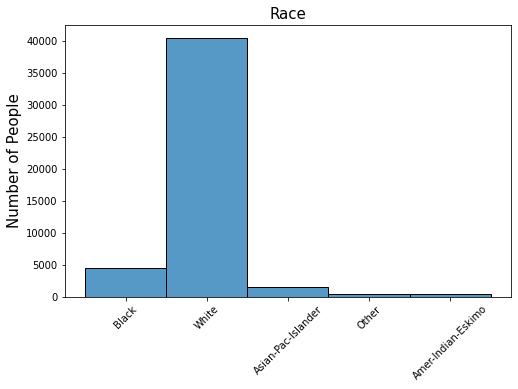

In [24]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "race", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('')
ax.set_title("Race", fontsize = 15);

- Outlier : White People

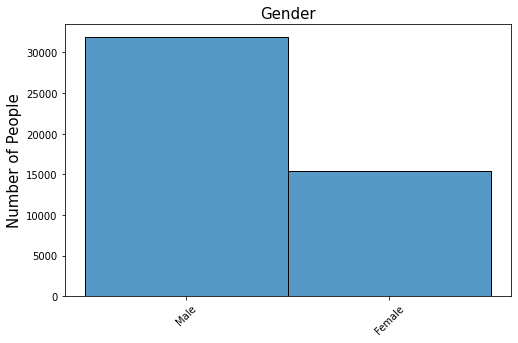

In [25]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "gender", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('')
ax.set_title("Gender", fontsize = 15);

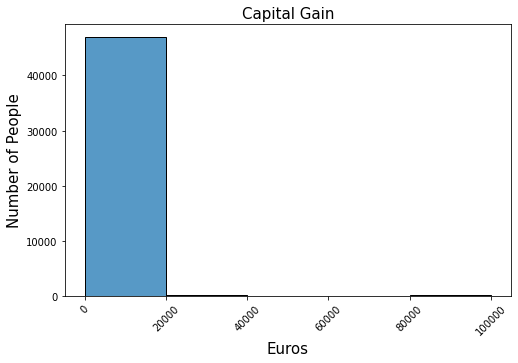

In [26]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "capital-gain", data=df, bins = 5)
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Euros', fontsize = 15)
ax.set_title("Capital Gain", fontsize = 15);

- Outlier: number of people who have contributed toward 0-20000 of capital gain

Text(0.5, 0, 'Euros')

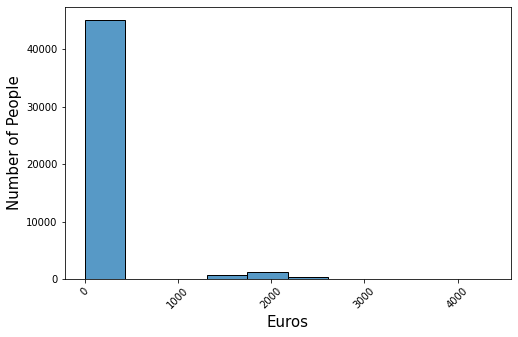

In [27]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "capital-loss", data=df, bins = 10)
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Euros', fontsize = 15)

- Outlier: number of people who have contributed toward 0-500 of capital loss

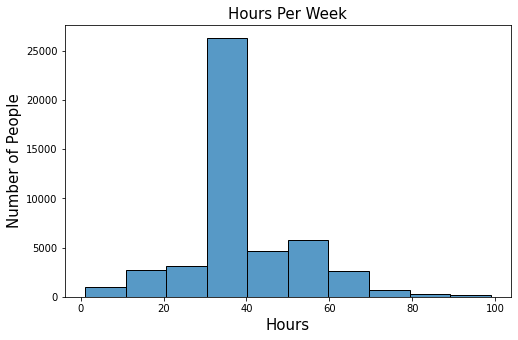

In [28]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "hours-per-week", data=df, bins = 10 )
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Hours', fontsize = 15)
ax.set_title("Hours Per Week", fontsize = 15);

- Outlier: 30-40 hours

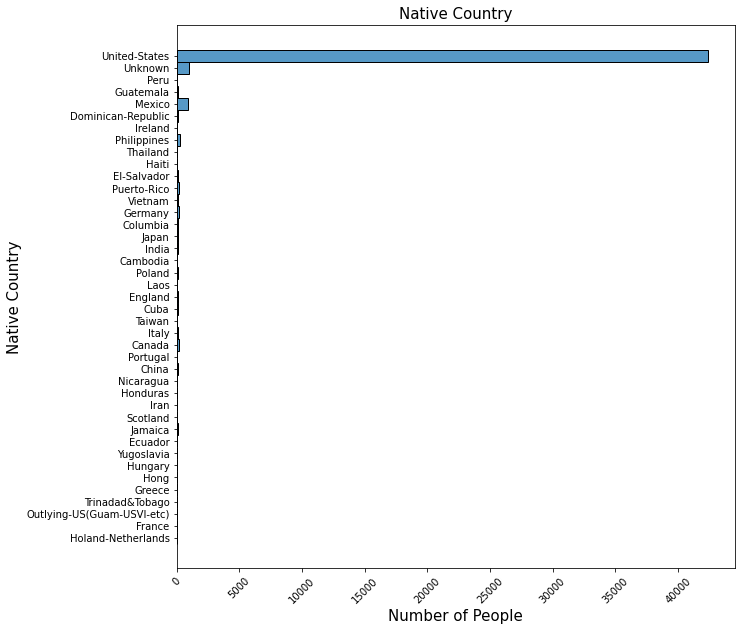

In [29]:
fig = plt.figure(figsize =(10, 10))
ax = sns.histplot( y = "native-country", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Native Country',fontsize = 15)
ax.set_xlabel('Number of People', fontsize = 15)
ax.set_title("Native Country", fontsize = 15);

- Outlier: United States

Text(0.5, 1.0, 'Income')

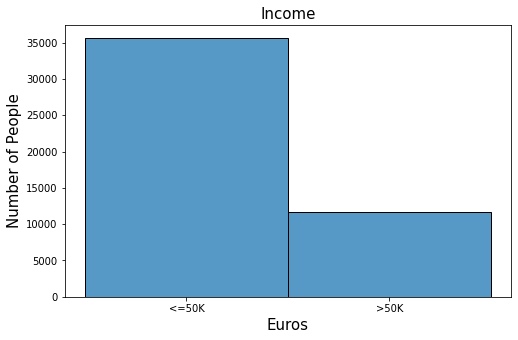

In [36]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "income", data=df)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Euros',fontsize = 15)
ax.set_title("Income",fontsize = 15)

- Outlier: Over 10000 people making less than 50k